<a href="https://colab.research.google.com/github/ozgeakar/FE/blob/main/Ozge_Akar_HW3_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/y-akbal/Tedu_Time_Series/blob/main/W5/HW3.ipynb)

###HW3 to Yıldrım Akbal

In [ ]:
import numpy as np
import scipy as sp
import statsmodels
import pandas as pd
from matplotlib import pyplot as plt

In [ ]:
!apt-get install r-base
!pip install rpy2
###Above we are pip installing a bridge between r and pyhton
import rpy2 # import rpy2's package module
from rpy2.robjects.packages import importr
utils = importr('utils')
import rpy2.robjects.packages as rpackages
utils.install_packages("TSA")
# import R's utility package
utils = rpackages.importr('TSA')  ### Time series analysis lib. is to be imported
import rpy2.robjects as robjects
r = robjects.r
from rpy2.robjects import r, pandas2ri
pandas2ri.activate()

Reading package lists... Done
Building dependency tree       
Reading state information... Done
r-base is already the newest version (4.2.2-1.1804.0).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 5 not upgraded.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


(as ‘lib’ is unspecified)

















































	‘/tmp/Rtmp2BJhwG/downloaded_packages’



In [ ]:
def download_ts():  ### This dude will download the dataset from the directory directly!
  import requests
  url = "https://raw.githubusercontent.com/y-akbal/Tedu_Time_Series/main/W5/data_setforHW3.csv"
  res = requests.get(url, allow_redirects=True)
  with open('data_setforHW3.csv','wb') as file:
    file.write(res.content)
  print("Dataset downloaded!")
download_ts()

Dataset downloaded!


In [ ]:
data = pd.read_csv("data_setforHW3.csv")  #### do not forget to pick the right column here! hint: iloc

In [ ]:
def see_significance_values(x): ### we will use this function for illustration purpossses.
  print(pd.DataFrame(np.array(list(x.items())[0][1])))

In [ ]:
data.head()

,Unnamed: 0,0
0,0,-2.129726
1,1,-2.331952
2,2,-0.212053
3,3,3.094479
4,4,4.031216


In [ ]:
data.isnull().mean() #looks good

Unnamed: 0    0.0
0             0.0
dtype: float64

In [ ]:
data = data.rename(columns={'0': 'sil', '0': 'HW3'})
data

,Unnamed: 0,HW3
0,0,-2.129726
1,1,-2.331952
2,2,-0.212053
3,3,3.094479
4,4,4.031216
...,...,...
1545,1545,1.423699
1546,1546,1.290949
1547,1547,-0.020783
1548,1548,-2.124222


In [ ]:
data.head = ["Unnamed: 0", "HW3"]
data = data.iloc[2:,1]
data.index = range(len(data))

In [ ]:
data #ok, we have only what we need now!

0      -0.212053
1       3.094479
2       4.031216
3       3.273952
4       3.148125
          ...   
1543    1.423699
1544    1.290949
1545   -0.020783
1546   -2.124222
1547   -1.536976
Name: HW3, Length: 1548, dtype: float64

In [ ]:
data5=data.sum()
data5
#I did because I wanted to check if there is any letter in the data what so ever in between..

31.877756764742365

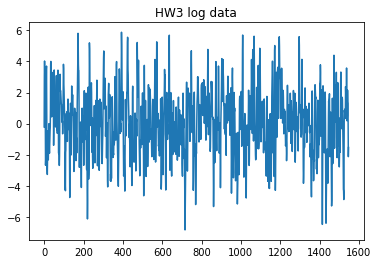

In [ ]:
import matplotlib.pyplot as plt
plt.title("HW3 log data")
plt.plot(data) 

In [ ]:
#Let's do some ECAF business...

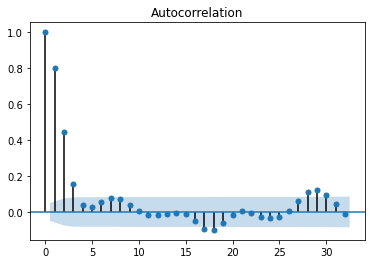

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(data); 

In [ ]:
data_ = data

from rpy2.robjects.conversion import localconverter
import rpy2.robjects as ro
with localconverter(ro.default_converter + pandas2ri.converter):
  r_df = ro.conversion.py2rpy(data_)

m = utils.eacf(r_df, 8, 29)
#it is not perfect, it looks like a real life data... Let's chose the best from what we have:s
#I have chosen 8 and 29 from autocorelation plot as far as I remember from our class, the best points are those peaks colse to the blue area...

AR/MA
  0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28
0 x x x o o x x x o o o  o  o  o  o  o  x  x  x  o  o  o  o  o  o  o  x  x  x 
1 x x x x o o x x o o o  o  o  o  o  o  x  x  x  o  o  o  o  o  o  o  o  x  x 
2 x x x x x x o o o o o  o  o  o  o  o  x  x  o  o  o  o  o  o  o  o  o  o  o 
3 x x x x o x x o o o o  o  o  o  o  o  o  o  o  o  o  o  o  o  o  o  o  o  o 
4 x o x x o o x o o o o  o  o  o  o  o  o  o  o  o  o  o  o  o  o  o  o  o  o 
5 x o x x x x o x o o o  o  o  o  o  o  o  o  o  o  o  o  o  o  o  o  o  o  o 
6 o x x x x x o x o o o  o  o  o  o  o  o  x  o  o  o  o  o  o  o  o  o  o  o 
7 x x x x x o o o o o o  o  o  o  o  o  o  o  o  o  o  o  o  o  o  o  o  o  o 
8 x x x x x o o o o o o  o  o  o  o  o  o  o  o  o  o  o  o  o  o  o  o  o  o 
  29
0 x 
1 x 
2 o 
3 o 
4 o 
5 o 
6 o 
7 o 
8 o 


In [ ]:
see_significance_values(m)

         0         1         2         3         4         5         6   \
0  0.803512  0.445921  0.156724  0.038003  0.027195  0.055715  0.076402   
1  0.597630  0.293223  0.073044 -0.205853 -0.025789  0.026508  0.064430   
2  0.332539  0.267183  0.096308 -0.065141 -0.083332  0.078254  0.024893   
3 -0.415673  0.265979 -0.265875  0.158223  0.008182  0.054167 -0.059397   
4  0.497870 -0.001568 -0.234576  0.178916 -0.021025  0.026583 -0.070368   
5  0.497952 -0.007449 -0.205893  0.140134  0.128859  0.101665 -0.038595   
6 -0.045516  0.282188  0.176249  0.056807  0.122800  0.074693  0.041648   
7  0.119471  0.283329  0.082810 -0.098876  0.105428  0.028488 -0.035577   
8 -0.405508  0.392954  0.121013 -0.218835  0.125312  0.020361 -0.017369   

         7         8         9   ...        20        21        22        23  \
0  0.071661  0.040806  0.005961  ...  0.003405 -0.007263 -0.025763 -0.035519   
1  0.068740  0.038623  0.010071  ... -0.002899 -0.002302 -0.024855 -0.042806   
2  0.0482

Let's think about the model. We can consider best options like; (4,4), (10,2), (20,0) and (10,4) 

In [ ]:
from statsmodels.tsa.arima.model import  ARIMA

### **4 Models...**

In [ ]:
#ARMA(4,4) model
model1 = ARIMA(data_, order = (4,0,4))
res1 = model1.fit()

In [ ]:
res1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    HW3   No. Observations:                 1548
Model:                 ARIMA(4, 0, 4)   Log Likelihood               -2175.125
Date:                Sun, 13 Nov 2022   AIC                           4370.250
Time:                        17:50:55   BIC                           4423.697
Sample:                             0   HQIC                          4390.130
                               - 1548                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0183      0.111      0.165      0.869      -0.199       0.235
ar.L1          1.7633      0.536      3.292      0.001       0.714       2.813
ar.L2         -1.3693      0.850     -1.610      0.107      -3.036       0.298
ar.L3          0.4443      0.511      0.870      0.384      -0.557       1.445
ar.L4         -0.0286      0.146     -0.196      0.845      -0.315       0.258
ma.L1         -0.3941      0.534     -0.738      0.460      -1.441       0.652
ma.L2          0.0855      0.219      0.390      0.697      -0.344       0.515
ma.L3         -0.0531      0.150     -0.354      0.723      -0.347       0.241
ma.L4          0.1958      0.157      1.248      0.212      -0.112       0.503
sigma2         0.9714      0.035     28.079      0.000       0.904       1.039
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 1.16
Prob(Q):                              0.96   Prob(JB):                         0.56
Heteroskedasticity (H):               0.90   Skew:                            -0.03
Prob(H) (two-sided):                  0.24   Kurtosis:                         3.12
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

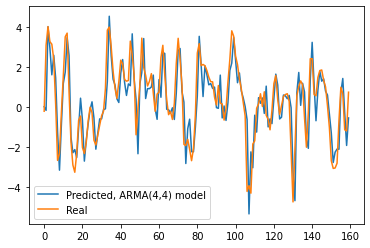

In [ ]:
plt.plot(res1.predict()[:160], label="Predicted, ARMA(4,4) model")
plt.plot(data_[:160], label="Real")
plt.legend()

In [ ]:
#ARMA(10,2) model 
model2 = ARIMA(data_, order = (10,0,2))
res2 = model2.fit()

In [ ]:
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    HW3   No. Observations:                 1548
Model:                ARIMA(10, 0, 2)   Log Likelihood               -2173.992
Date:                Sun, 13 Nov 2022   AIC                           4375.984
Time:                        17:56:11   BIC                           4450.810
Sample:                             0   HQIC                          4403.816
                               - 1548                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0184      0.112      0.165      0.869      -0.200       0.237
ar.L1          0.6894      3.188      0.216      0.829      -5.558       6.937
ar.L2         -0.1191      2.887     -0.041      0.967      -5.777       5.538
ar.L3         -0.1079      1.094     -0.099      0.921      -2.253       2.037
ar.L4          0.0615      1.372      0.045      0.964      -2.628       2.751
ar.L5          0.0027      0.932      0.003      0.998      -1.824       1.829
ar.L6          0.0066      0.281      0.023      0.981      -0.543       0.556
ar.L7          0.0095      0.225      0.042      0.967      -0.432       0.451
ar.L8          0.0416      0.200      0.208      0.835      -0.350       0.433
ar.L9         -0.0277      0.075     -0.369      0.712      -0.175       0.120
ar.L10        -0.0065      0.120     -0.054      0.957      -0.241       0.228
ma.L1          0.6802      3.188      0.213      0.831      -5.569       6.929
ma.L2          0.3049      1.772      0.172      0.863      -3.167       3.777
sigma2         0.9700      0.034     28.152      0.000       0.902       1.038
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 1.50
Prob(Q):                              0.96   Prob(JB):                         0.47
Heteroskedasticity (H):               0.90   Skew:                            -0.03
Prob(H) (two-sided):                  0.26   Kurtosis:                         3.14
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

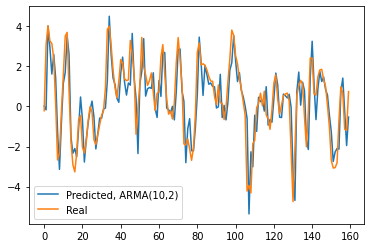

In [ ]:
plt.plot(res2.predict()[:160], label="Predicted, ARMA(10,2)")
plt.plot(data_[:160], label="Real")
plt.legend()

In [ ]:
#ARMA(20,0) model 
model3 = ARIMA(data_, order = (20,0,0))
res3 = model3.fit()

In [ ]:
res3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    HW3   No. Observations:                 1548
Model:                ARIMA(20, 0, 0)   Log Likelihood               -2164.907
Date:                Sun, 13 Nov 2022   AIC                           4373.814
Time:                        17:58:39   BIC                           4491.398
Sample:                             0   HQIC                          4417.549
                               - 1548                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0166      0.102      0.162      0.871      -0.184       0.217
ar.L1          1.3661      0.025     54.993      0.000       1.317       1.415
ar.L2         -0.7354      0.044    -16.721      0.000      -0.822      -0.649
ar.L3         -0.0256      0.048     -0.530      0.596      -0.120       0.069
ar.L4          0.2998      0.048      6.212      0.000       0.205       0.394
ar.L5         -0.1927      0.048     -3.981      0.000      -0.288      -0.098
ar.L6          0.0468      0.048      0.974      0.330      -0.047       0.141
ar.L7          0.0338      0.047      0.715      0.475      -0.059       0.126
ar.L8          0.0045      0.047      0.095      0.925      -0.088       0.097
ar.L9         -0.0371      0.049     -0.750      0.453      -0.134       0.060
ar.L10         0.0173      0.050      0.347      0.729      -0.081       0.115
ar.L11         0.0016      0.049      0.033      0.973      -0.095       0.098
ar.L12        -0.0057      0.049     -0.116      0.907      -0.101       0.090
ar.L13        -0.0018      0.050     -0.037      0.971      -0.099       0.095
ar.L14        -0.0124      0.050     -0.248      0.804      -0.111       0.086
ar.L15         0.0393      0.050      0.780      0.436      -0.059       0.138
ar.L16        -0.0111      0.048     -0.229      0.819      -0.106       0.084
ar.L17        -0.0907      0.049     -1.868      0.062      -0.186       0.004
ar.L18         0.0486      0.049      0.990      0.322      -0.048       0.145
ar.L19         0.0371      0.045      0.818      0.413      -0.052       0.126
ar.L20        -0.0316      0.027     -1.189      0.234      -0.084       0.020
sigma2         0.9585      0.034     28.215      0.000       0.892       1.025
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 2.90
Prob(Q):                              0.96   Prob(JB):                         0.23
Heteroskedasticity (H):               0.92   Skew:                            -0.05
Prob(H) (two-sided):                  0.34   Kurtosis:                         3.19
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

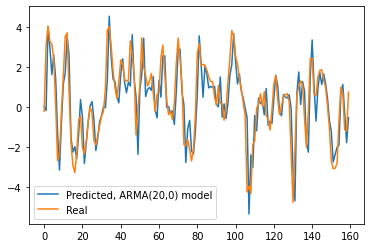

In [ ]:
plt.plot(res3.predict()[:160], label="Predicted, ARMA(20,0) model")
plt.plot(data_[:160], label="Real")
plt.legend()

In [ ]:
#ARMA(10,4) model
model4 = ARIMA(data_, order = (10,0,4))
res4 = model4.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


In [ ]:
res4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    HW3   No. Observations:                 1548
Model:                ARIMA(10, 0, 4)   Log Likelihood               -2169.796
Date:                Sun, 13 Nov 2022   AIC                           4371.591
Time:                        18:04:12   BIC                           4457.107
Sample:                             0   HQIC                          4403.399
                               - 1548                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0037      0.109      0.034      0.973      -0.211       0.218
ar.L1          1.3239      0.418      3.167      0.002       0.505       2.143
ar.L2         -0.6817      0.557     -1.224      0.221      -1.773       0.410
ar.L3         -0.0727      0.685     -0.106      0.915      -1.416       1.270
ar.L4          1.1582      0.651      1.778      0.075      -0.119       2.435
ar.L5         -1.3495      0.455     -2.965      0.003      -2.241      -0.458
ar.L6          0.6807      0.211      3.224      0.001       0.267       1.095
ar.L7          0.0577      0.119      0.483      0.629      -0.176       0.292
ar.L8         -0.2543      0.114     -2.235      0.025      -0.477      -0.031
ar.L9          0.1274      0.062      2.042      0.041       0.005       0.250
ar.L10        -0.0429      0.032     -1.361      0.174      -0.105       0.019
ma.L1          0.0549      0.418      0.131      0.895      -0.764       0.873
ma.L2          0.0023      0.418      0.005      0.996      -0.816       0.821
ma.L3          0.0178      0.375      0.048      0.962      -0.717       0.753
ma.L4         -0.8465      0.363     -2.332      0.020      -1.558      -0.135
sigma2         0.9726      0.035     28.021      0.000       0.905       1.041
===================================================================================
Ljung-Box (L1) (Q):                   0.16   Jarque-Bera (JB):                 1.92
Prob(Q):                              0.69   Prob(JB):                         0.38
Heteroskedasticity (H):               0.91   Skew:                            -0.04
Prob(H) (two-sided):                  0.31   Kurtosis:                         3.15
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

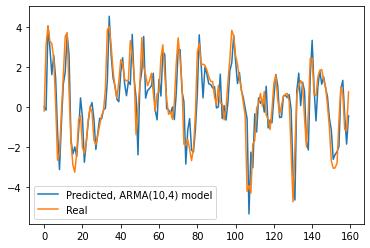

In [ ]:
plt.plot(res4.predict()[:160], label="Predicted, ARMA(10,4) model")
plt.plot(data_[:160], label="Real")
plt.legend()

I don't see any signifacant difference! Let's perform a Ljung-Box test for all mmodels.

In [ ]:
import statsmodels.api as sm
sm.stats.acorr_ljungbox(res1.resid, return_df=True, model_df = 3)

/usr/local/lib/python3.7/dist-packages/statsmodels/stats/diagnostic.py:533: FutureWarning: The default value of lags is changing.  After 0.12, this value will become min(10, nobs//5). Directly setlags to silence this warning.
  "lags to silence this warning.", FutureWarning)


,lb_stat,lb_pvalue
1,0.003924,NaN
2,0.003944,NaN
3,0.007035,NaN
4,0.041727,0.838141
5,0.042340,0.979053
6,0.042428,0.997705
7,0.390376,0.983257
8,1.725398,0.885685
9,1.730096,0.942774
10,1.764497,0.971719


In [ ]:
sm.stats.acorr_ljungbox(res2.resid, return_df=True, model_df = 3)

/usr/local/lib/python3.7/dist-packages/statsmodels/stats/diagnostic.py:533: FutureWarning: The default value of lags is changing.  After 0.12, this value will become min(10, nobs//5). Directly setlags to silence this warning.
  "lags to silence this warning.", FutureWarning)


,lb_stat,lb_pvalue
1,0.004479,NaN
2,0.006605,NaN
3,0.014831,NaN
4,0.015114,0.902154
5,0.015118,0.992469
6,0.016729,0.999427
7,0.016789,0.999965
8,0.026879,0.999994
9,0.031496,0.999999
10,0.059695,1.000000


In [ ]:
sm.stats.acorr_ljungbox(res3.resid, return_df=True, model_df = 3)

/usr/local/lib/python3.7/dist-packages/statsmodels/stats/diagnostic.py:533: FutureWarning: The default value of lags is changing.  After 0.12, this value will become min(10, nobs//5). Directly setlags to silence this warning.
  "lags to silence this warning.", FutureWarning)


,lb_stat,lb_pvalue
1,0.003783,NaN
2,0.005240,NaN
3,0.014194,NaN
4,0.014216,0.905093
5,0.014283,0.992884
6,0.026108,0.998887
7,0.038434,0.999818
8,0.084835,0.999892
9,0.092989,0.999984
10,0.157244,0.999989


In [ ]:
sm.stats.acorr_ljungbox(res4.resid, return_df=True, model_df = 3)

/usr/local/lib/python3.7/dist-packages/statsmodels/stats/diagnostic.py:533: FutureWarning: The default value of lags is changing.  After 0.12, this value will become min(10, nobs//5). Directly setlags to silence this warning.
  "lags to silence this warning.", FutureWarning)


,lb_stat,lb_pvalue
1,0.171861,NaN
2,0.192722,NaN
3,0.196418,NaN
4,0.302302,0.582443
5,0.364913,0.833221
6,0.376145,0.945125
7,0.565132,0.966858
8,0.619838,0.987077
9,0.619985,0.996058
10,1.529626,0.981266


## **When I compare p values and lags, I can tell ARMA(4,4) model can be a good fit for our data.**

Thank you Hocam! 
###Congrats!!!, you reached the end of HW3, now go to File-> Download -> Download .ipynb.
##Save the file and upload it to LMS system. Grab a cup of coffee, and do some la dolce vita.